In [116]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [117]:
df = pd.read_csv("csgo.csv")
df.info()

# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="CSGO Report", explorative=True)
# profile.to_file("csgo_report.html")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   map            1133 non-null   object 
 1   day            1133 non-null   float64
 2   month          1133 non-null   float64
 3   year           1133 non-null   float64
 4   date           1133 non-null   object 
 5   wait_time_s    1133 non-null   float64
 6   match_time_s   1133 non-null   float64
 7   team_a_rounds  1133 non-null   float64
 8   team_b_rounds  1133 non-null   float64
 9   ping           1133 non-null   float64
 10  kills          1133 non-null   float64
 11  assists        1133 non-null   float64
 12  deaths         1133 non-null   float64
 13  mvps           1133 non-null   float64
 14  hs_percent     1133 non-null   float64
 15  points         1133 non-null   float64
 16  result         1133 non-null   object 
dtypes: float64(14), object(3)
memory usage: 150.6+ KB


In [118]:
print(df.columns)

Index(['map', 'day', 'month', 'year', 'date', 'wait_time_s', 'match_time_s',
       'team_a_rounds', 'team_b_rounds', 'ping', 'kills', 'assists', 'deaths',
       'mvps', 'hs_percent', 'points', 'result'],
      dtype='object')


In [119]:
df = df.drop(['map', 'day', 'month','year','date', 'ping'], axis=1)
target = 'result'
x = df.drop(target, axis=1)
y = df[[target]]
print(y)


     result
0       Win
1      Lost
2       Win
3      Lost
4       Tie
...     ...
1128   Lost
1129   Lost
1130   Lost
1131   Lost
1132    Win

[1133 rows x 1 columns]


In [120]:
result_catetories = ['Tie', 'Lost', 'Win']
ord_transformer = OrdinalEncoder(categories=[result_catetories])
num_transformer = StandardScaler()
y = ord_transformer.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [121]:
column_list_full = df.columns.tolist()
column_list_full.remove('result')

In [122]:
base_rf = RandomForestClassifier()
ada_rf = AdaBoostClassifier(estimator=base_rf, n_estimators=100, random_state=42)
preprocessor = ColumnTransformer(transformers=[
    ("num_transformer", num_transformer, column_list_full),
])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ada_rf)
])

In [123]:
print(x_train.columns)

Index(['wait_time_s', 'match_time_s', 'team_a_rounds', 'team_b_rounds',
       'kills', 'assists', 'deaths', 'mvps', 'hs_percent', 'points'],
      dtype='object')


In [124]:
model.fit(x_train, y_train)

/home/nhnloc/VietAI-x-CoderSchool/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nhnloc/VietAI-x-CoderSchool/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  StandardScaler(),
                                                  ['wait_time_s',
                                                   'match_time_s',
                                                   'team_a_rounds',
                                                   'team_b_rounds', 'kills',
                                                   'assists', 'deaths', 'mvps',
                                                   'hs_percent', 'points'])])),
                ('classifier',
                 AdaBoostClassifier(estimator=RandomForestClassifier(),
                                    n_estimators=100, random_state=42))])

In [125]:
y_pred = model.predict(x_test)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.86      0.87      0.86       119
         2.0       0.84      0.83      0.83        99

    accuracy                           0.85       227
   macro avg       0.90      0.90      0.90       227
weighted avg       0.85      0.85      0.85       227



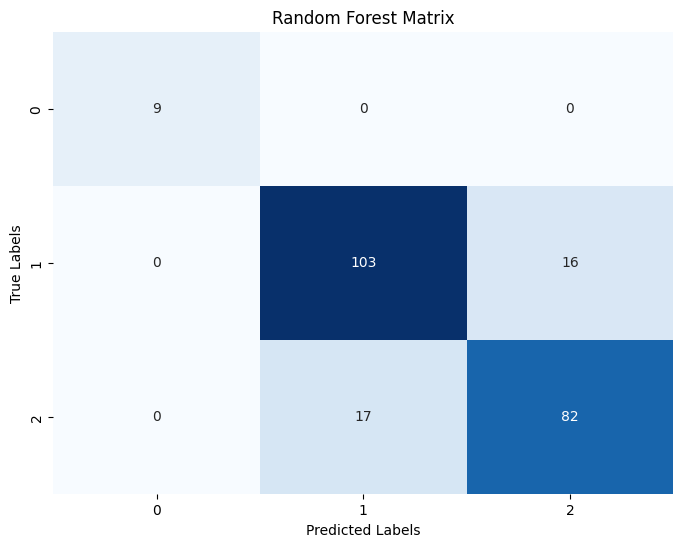

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Matrix")
plt.show()

In [128]:
base_rf = RandomForestClassifier()
# ada_rf = AdaBoostClassifier(estimator=base_rf, n_estimators=100, random_state=42)
preprocessor = ColumnTransformer(transformers=[
    ("num_transformer", num_transformer, column_list_full),
])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', base_rf)
])
model.fit(x_train, y_train)


/home/nhnloc/VietAI-x-CoderSchool/venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  StandardScaler(),
                                                  ['wait_time_s',
                                                   'match_time_s',
                                                   'team_a_rounds',
                                                   'team_b_rounds', 'kills',
                                                   'assists', 'deaths', 'mvps',
                                                   'hs_percent', 'points'])])),
                ('classifier', RandomForestClassifier())])

In [129]:
y_pred = model.predict(x_test)

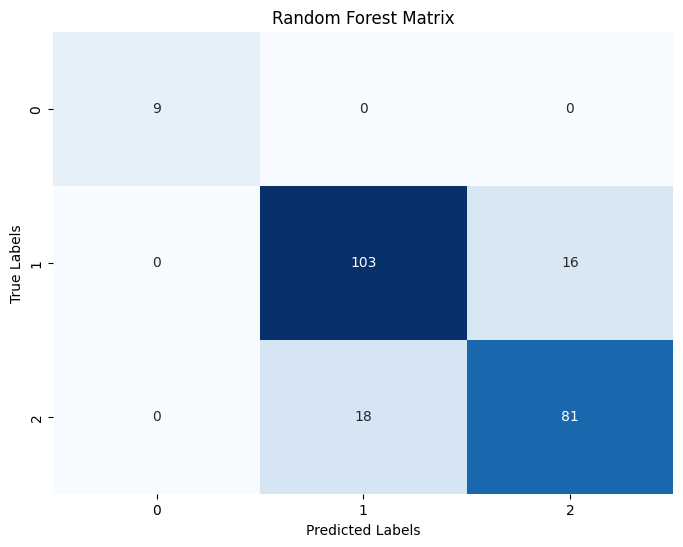

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Matrix")
plt.show()